In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
!mkdir data

In [6]:
df=pd.read_csv(os.path.join('data','train.csv'))

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [11]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [12]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [13]:
from tensorflow.keras.layers import TextVectorization

In [14]:
x=df['comment_text']
y=df[df.columns[2:] ].values

In [15]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [16]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [17]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [18]:
max_feature=200000

In [19]:
vectorizer=TextVectorization(max_tokens=max_feature,output_sequence_length=1800,output_mode='int')

In [20]:
vectorizer.adapt(x.values)

In [21]:
vectorizer('Hello world,life is great')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288,   1,   9, ...,   0,   0,   0])>

In [22]:
vectorizer_text=vectorizer(x.values)

In [23]:
vectorizer_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [24]:
dataset=tf.data.Dataset.from_tensor_slices((vectorizer_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [26]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [27]:
batch_x

array([[586, 101,   2, ...,   0,   0,   0],
       [  3,  17, 998, ...,   0,   0,   0],
       [181, 234,  22, ...,   0,   0,   0],
       ...,
       [ 76,  88,   7, ...,   0,   0,   0],
       [ 70,  15, 187, ...,   0,   0,   0],
       [113, 240,   3, ...,   0,   0,   0]])

In [28]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [29]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [30]:
len(train)

6981

In [34]:
train_generator=train.as_numpy_iterator()

In [35]:
train_generator.next()

(array([[  84,   11, 1000, ...,    0,    0,    0],
        [   7,   20,    6, ...,    0,    0,    0],
        [  15,  300, 6154, ...,    0,    0,    0],
        ...,
        [   8,  525,   11, ...,    0,    0,    0],
        [ 248,  111,    4, ...,    0,    0,    0],
        [ 454,  472,    3, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [37]:
model=Sequential()
model.add(Embedding(max_feature+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(6,activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [41]:
history=model.fit(train,epochs=1,validation_data=val)

6981/6981 [==============================] - 13095s 2s/step - loss: 0.0623 - accuracy: 0.9822 - val_loss: 0.0473 - val_accuracy: 0.9940


In [42]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

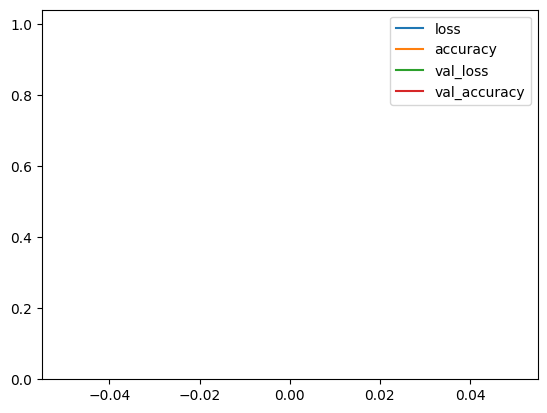

In [43]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [44]:
input_text=vectorizer('You freaking suck!')

In [45]:
batch=test.as_numpy_iterator().next()

In [49]:
batch_x, batch_y=test.as_numpy_iterator().next()

In [50]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 0s 219ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [51]:
batch_x

array([[43056,     7,    59, ...,     0,     0,     0],
       [   21,  2384,   425, ...,     0,     0,     0],
       [17142,  8383,     1, ...,     0,     0,     0],
       ...,
       [    8,    44,    15, ...,     0,     0,     0],
       [64928,   729,    21, ...,     0,     0,     0],
       [    1,    46,    55, ...,     0,     0,     0]])

In [52]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 129ms/step


In [53]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy,CategoricalAccuracy

In [57]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
  # unpack the batch
   x_true, y_true = batch
   yhat=model.predict(x_true)

   y_true=y_true.flatten()
   yhat=yhat.flatten()

   pre.update_state(y_true,yhat)
   re.update_state(y_true,yhat)
   acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 372ms/step


In [59]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.872757613658905,Recall:0.5911274552345276,Accuracy:0.5115346312522888


In [60]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.1 MB/s

In [74]:
import gradio as gr
import tensorflow as tf

In [63]:
model.save('toxicity.h5')

In [66]:
model=tf.keras.models.load_model('toxicity.h5')

In [67]:
input_str=vectorizer('hey i freaken hate you')

In [70]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [71]:
res

array([[0.6713004 , 0.0230428 , 0.32014212, 0.02468223, 0.25897247,
        0.07217117]], dtype=float32)

In [72]:
def score_comment(comment):
  vectorized_comment=vectorizer([comment])
  results=model.predict(vectorized_comment)

  text=' '
  for idx, col in enumerate(df.columns[2:-1]):
    text=text+ '{}:  {} \n'.format(col,results[0][idx]>0.5)
  return text

In [75]:
import gradio as gr

In [79]:
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
    outputs='text'
)

In [80]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0de6f8e5f2873081e0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
